# Social Recommendation Systems (CiaoDVD Dataset)

## Goal
The aim of this project is to build a tool that implements and compares different types of recommendation algorithms on a real-world dataset. The tool should be able to: 
- Load the dataset 
- Run different recommendation algorithms on the dataset 
- Compare and discuss the results, parameter sensitivity

### Task 1. Load the dataset
- Load the CiaoDVD dataset from https://www.librec.net/datasets.html
- Explore the properties of the graph

In [66]:
# Import all the modules and dependencies required 
import pandas as pd
import numpy as np
import warnings

# Widgets for graphical interface
import ipywidgets as widgets
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, clear_output

import plots
import splitData
import metrics

# Used to get multiple outputs per cell
InteractiveShell.ast_node_interactivity = "all"

warnings.filterwarnings("ignore")  # ignore warnings in logs

#### Loading Dataset

In [67]:
# Loading Dataset
headers = ['userId', 'movieId', 'movie_categoryId', 'reviewId', 'movieRating', 'reviewDate']
columns = ['userId', 'movieId', 'movie_categoryId', 'movieRating']
dataset = pd.read_csv('Dataset/movie-ratings.txt',
                           names=headers, usecols=columns, dtype={'userId': 'str', 'movieId': 'str', 'movie_categoryId':'str'})
# Dataset information
print('Dataset information')
num_users = dataset.userId.unique().shape[0]
num_items = dataset.movieId.unique().shape[0]
num_cat = dataset.movie_categoryId.unique().shape[0]
sparsity = 1 - len(dataset) / (num_users * num_items)
print(f"Users: {num_users}\nMovies: {num_items}\nCategories: {num_cat}\nSparsity: {sparsity}")
dataset.info()
dataset.describe()

Dataset information
Users: 17615
Movies: 16121
Categories: 17
Sparsity: 0.9997441115684126
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72665 entries, 0 to 72664
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userId            72665 non-null  object
 1   movieId           72665 non-null  object
 2   movie_categoryId  72665 non-null  object
 3   movieRating       72665 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


,movieRating
count,72665.000000
mean,4.072910
std,1.081442
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


#### Movie categories analysis

,count,mean,std,min,25%,50%,75%,max
movieRating,17.0,4.154724,0.246792,3.555667,4.02443,4.171916,4.295187,4.557371



Ratings per category


,movieRating,ratings_per_category
movie_categoryId,,
16,4.058542,14639
13,4.024159,12128
14,4.121325,12075
17,3.555667,6952
15,4.557371,5447


,movieRating,ratings_per_category
movie_categoryId,,
5,4.380000,350
2,4.090032,311
10,4.264228,246


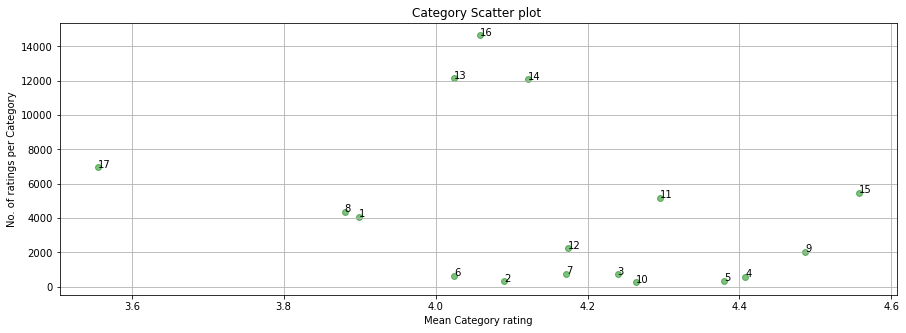

In [68]:
#dataset.groupby('movie_categoryId')['movieId'].count().sort_values(ascending=False)
#dataset.groupby('movie_categoryId')['movieRating'].mean().sort_values(ascending=False)
# average categorie ratings
categories = pd.DataFrame(dataset.groupby('movie_categoryId')['movieRating'].mean())

categories.describe().T

# quantity of movies per categorie
categories['ratings_per_category'] = dataset.groupby('movie_categoryId')['movieId'].count()

# sorted by number of categories
print('\nRatings per category')
categories.sort_values('ratings_per_category', ascending=False).head()
categories.sort_values('ratings_per_category', ascending=False).tail(3)

# Plot number of movies per categories
plot_settings = {
    'axisX':'movieRating', 
    'axisY': 'ratings_per_category', 
    'topic': 'Category', 
    'color':'green',
    'labels': categories.index}
plots.scatterPlot(categories, plot_settings)

#### Rating Analysis

,count,mean,std,min,25%,50%,75%,max
movieRating,16121.0,3.904244,1.000072,1.0,3.2,4.0,4.8,5.0



Ratings per Movie


,movieRating,ratings_per_movie
movieId,,
6119,4.662818,433
6068,3.838120,383
12105,4.360269,297
7584,4.658120,234
6159,4.705628,231


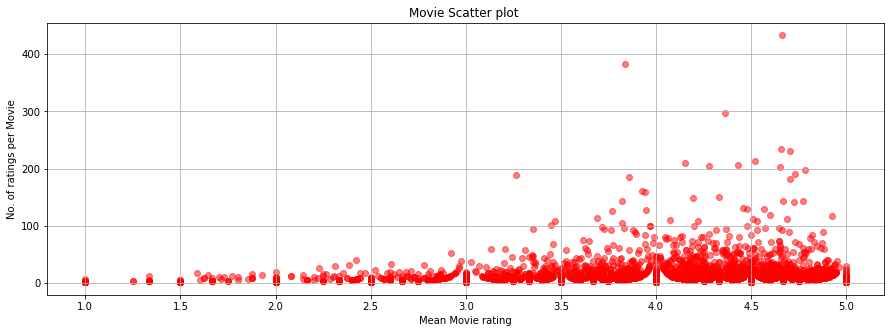

In [69]:
# average rating for each movie
ratings = pd.DataFrame(dataset.groupby('movieId')['movieRating'].mean())

ratings.describe().T

# quantity of ratings per movie
ratings['ratings_per_movie'] = dataset.groupby('movieId')['movieRating'].count()

# sorted by number of ratings
print('\nRatings per Movie')
ratings.sort_values('ratings_per_movie', ascending=False).head()

# Plot number of movies per rating
plot_settings = {
    'axisX':'movieRating', 
    'axisY': 'ratings_per_movie', 
    'topic': 'Movie'}
plots.scatterPlot(ratings, plot_settings)

#### Split the dataset in training and testing data

In [70]:
# Split the Dataset in train 80% and test 20%
train_data, test_data = splitData.split_train_test(dataset, 0.2)

# From here the train_data is the dataset to make the computings
# and test_data is only for measures after the results
print('Train Dataset')
train_data
print('\nTest Dataset')
test_data

Train Dataset


userId,1,10,100,1000,10001,10002,10003,10004,10005,10006,...,999,9990,9991,9992,9994,9995,9996,9997,9998,9999
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Test Dataset


userId,1,10,100,10000,10005,10007,10014,10017,1002,1003,...,9970,9971,9975,9978,998,9985,9986,9988,9989,9993
movieId,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### User ratings average values

User ratings avg.


userId
1        4.083333
10       3.500000
100      3.653846
1000     4.500000
10001    5.000000
           ...   
9995     4.500000
9996     4.500000
9997     5.000000
9998     5.000000
9999     5.000000
Length: 15510, dtype: float64

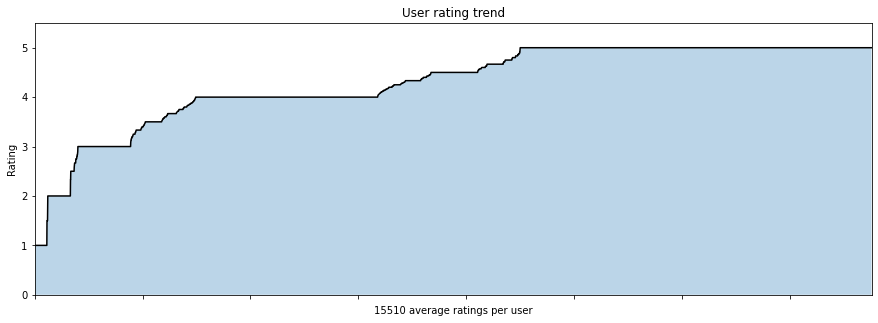

In [71]:
# We get the average of all the movie ratings for each user
user_mean = train_data.mean(axis=0, skipna=True)
# Print the user ratings mean value
print('User ratings avg.')
user_mean

# Plot number of movies per rating
plots.avg_ratings_per_user(user_mean)

### User based Collaborative Filtering Recommender with pearson correlation coefficient

#### Pearson correlation coeficient

In [72]:
def get_pearson_correlation(data_set, user):
    # The high correlation coefficients are the users that are most similar to target user
    # Pearson correlation coefficient: this will lie between -1 and 1
    pearson_corr = data_set.corrwith(data_set[user], method='pearson')

    return pearson_corr

#### Neighborhood selection based on k size

In [73]:
# The k similar users for target user, the highest the correlation value, the more similar.
def get_neighborhood(data_set, pearson_corr, user, k, threshold):
    # Sort the correlation vector in descending way, to get the most similar at first
    corr_top = pearson_corr.sort_values(ascending=False)

    # Neighborhood selection: Based on Threshold and the most similar users
    if 0 < len(corr_top) and ~pd.isnull(corr_top).all():
        top = corr_top[(corr_top.iloc[0:] < threshold)].index
        # Drop the user target itself and the users under the threshold
        corr_top = corr_top.drop(top).drop([user])[:k].to_frame().T
    else:
        a = np.empty(len(data_set))
        a[:] = np.nan
        return a  # if there is not neighbors or the correlation is nan return a vector of nan

    return corr_top

## Testing

#### Random selection of users

In [74]:
import random

users = set(test_data.columns.intersection(train_data.columns).values)
number_of_users = len(users)

def get_random_users(q):
    samples = random.sample(users, q)
    return samples

##### Below is possible to set the number of users randomly selected to compute the prediction

In [75]:
# Insert number of users, that will be selected randomly from posible target users 
q_user = widgets.BoundedIntText(value=1, min=1, max=number_of_users, step=1, description='No. users:', disabled=False)

current_users = []

# The function to interact in real time
def random_user(x = 1):
    clear_output()
    global current_users
    current_users = get_random_users(q_user.value)
    print('Users randomly selected')
    display(pd.DataFrame(current_users).T)

widgets.interact(random_user, x = q_user)

interactive(children=(BoundedIntText(value=1, description='No. users:', max=4294, min=1), Output()), _dom_clas…

<function __main__.random_user(x=1)>

#### Setting global variables

In [76]:
# The number of neighbors for the prediction
k = widgets.IntText(value= 5, description= 'k size: ', disable= False)
# The min and max boundaries for the score
bounds = (1,5) 
# Value used for neighborhood selection
threshold = widgets.FloatSlider(value= 0, min= -1, max= 1, step=0.01, description= 'Threshold: ')
# Button to start computing
button = widgets.Button(description='Run')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        for current_user in current_users:
            print('For user: ',current_user)
            pearson_corr = get_pearson_correlation(train_data, current_user)
            display(get_neighborhood(train_data, pearson_corr, current_user, k.value, threshold.value))
        print('Done!')
button.on_click(on_button_clicked)

# Widgets interface
k
threshold
display(button, output)

IntText(value=5, description='k size: ')

FloatSlider(value=0.0, description='Threshold: ', max=1.0, min=-1.0, step=0.01)

Button(description='Run', style=ButtonStyle())

Output()